# Import the dataset with required libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ed = pd.read_csv('spam.csv',encoding='latin-1')


In [3]:
ed.sample(5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3184,ham,MAYBE IF YOU WOKE UP BEFORE FUCKING 3 THIS WOU...,NaN,NaN,NaN
4332,ham,Y bishan lei... I tot Ì_ say lavender?,NaN,NaN,NaN
4792,ham,Or u ask they all if next sat can a not. If al...,NaN,NaN,NaN
261,ham,Anyway i'm going shopping on my own now. Cos m...,NaN,NaN,NaN
3682,ham,When did i use soc... I use it only at home......,NaN,NaN,NaN


In [4]:
ed.shape


(5572, 5)

In [5]:
ed.isnull().sum()


v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# 1st Step Data Cleaning


In [7]:

#Now drop the unuse column

ed.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
ed.sample(5)


,v1,v2
1085,ham,FR'NDSHIP is like a needle of a clock. Though ...
250,ham,Ranjith cal drpd Deeraj and deepak 5min hold
691,ham,Sorry to trouble u again. Can buy 4d for my da...
5103,ham,In other news after hassling me to get him wee...
1278,ham,Can i meet Ì_ at 5.. As 4 where depends on whe...


In [9]:
#Now rename the column name

ed.rename(columns={'v1' : 'Catagory','v2' : 'Email Body'},inplace=True)

In [10]:
ed.sample(5)


,Catagory,Email Body
3515,ham,"Well, I was about to give up cos they all said..."
5314,spam,Get the official ENGLAND poly ringtone or colo...
419,spam,Send a logo 2 ur lover - 2 names joined by a h...
5326,ham,What makes you most happy?
4995,ham,Happy new year. Hope you are having a good sem...


In [11]:
#Now apply the LableEncoder method on ""Catagory"" column

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
ed['Catagory'] = encoder.fit_transform(ed['Catagory'])


In [13]:
#Here in the Catagory column have two value 1st Ham and 2nd spam.
#So after apply the LabelEncoder method change the vaule from 0 or 1.
#Here Ham=0 and Spam=1

ed.sample(10)

,Catagory,Email Body
2578,0,Erm. I thought the contract ran out the4th of ...
3640,1,You can stop further club tones by replying \S...
2470,0,Eat at old airport road... But now 630 oredi.....
1837,0,And how's your husband.
2497,0,Dai what this da.. Can i send my resume to thi...
308,1,TheMob> Check out our newest selection of cont...
2685,1,URGENT! We are trying to contact U. Todays dra...
4837,0,All boys made fun of me today. Ok i have no pr...
746,0,"I promise to take good care of you, princess. ..."
2875,0,Fuck cedar key and fuck her (come over anyway ...


In [14]:
#Now check duplicate values and removed.

ed.duplicated().sum()

403

In [15]:
ed = ed.drop_duplicates(keep='first')

In [16]:
ed.duplicated().sum()

0

In [17]:
ed.shape


(5169, 2)

# 2nd Step EDA

In [18]:
ed.sample(5)


,Catagory,Email Body
1183,0,Am i that much bad to avoid like this?
1409,0,Where at were hungry too
4632,0,Oh wow thats gay. Will firmware update help
1088,1,You are awarded a SiPix Digital Camera! call 0...
390,0,Huh so late... Fr dinner?


In [19]:
ed['Catagory'].value_counts()


0    4516
1     653
Name: Catagory, dtype: int64

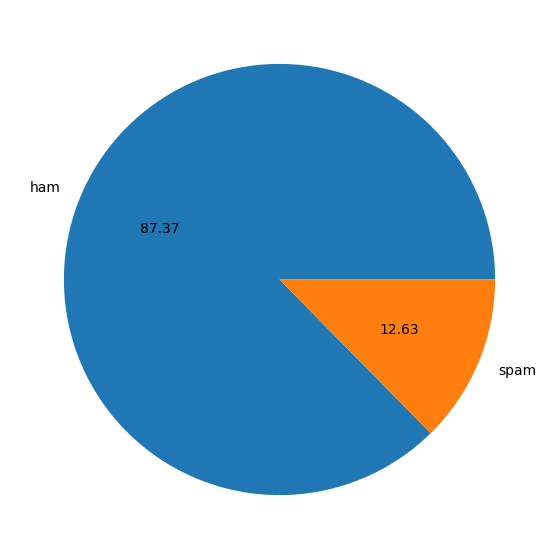

In [20]:
#Now create PieChart for better understanding
fig, ax = plt.subplots(figsize =(10, 7))
colors = ( "orange", "cyan")
plt.pie(ed['Catagory'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [21]:
#Now we identifie the data is inbalanced, so we deep drive for EDA with NLTK liberaies.

!pip install nltk

In [22]:
import nltk


In [23]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to C:\Users\Naren
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
#Now we have creat a 3-columns for help of email body.
#Let's see the lenth of email body.

ed['num_chr'] = ed['Email Body'].apply(len)

In [25]:
ed.sample(5)


,Catagory,Email Body,num_chr
2900,1,Ur cash-balance is currently 500 pounds - to m...,139
4861,1,**FREE MESSAGE**Thanks for using the Auction S...,159
4518,0,Just got part Nottingham - 3 hrs 63miles. Good...,104
777,0,\Hi its Kate it was lovely to see you tonight ...,122
2260,1,SplashMobile: Choose from 1000s of gr8 tones e...,155


In [26]:
#We calculate num. of words for each email body with help of NLTK.

ed['num_words'] = ed['Email Body'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
ed.sample(5)


,Catagory,Email Body,num_chr,num_words
4913,0,You've already got a flaky parent. It'snot sup...,237,53
2324,0,Ok lor.,7,3
5231,0,I realise you are a busy guy and i'm trying no...,143,37
341,0,I take it the post has come then! You must hav...,151,35
5518,0,"By the way, i've put a skip right outside the ...",122,31


In [28]:
#Apply the same rule for calculated sentences.

ed['num_sent'] = ed['Email Body'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
ed.sample(5)


,Catagory,Email Body,num_chr,num_words,num_sent
1977,1,Reply to win å£100 weekly! Where will the 2006...,104,23,3
4505,0,When are you guys leaving?,26,6,1
4308,0,He dint tell anything. He is angry on me that ...,66,17,2
5313,0,My sister going to earn more than me da.,40,10,1
3386,0,So u workin overtime nigpun?,28,6,1


In [30]:
ed[['num_chr','num_words','num_sent']].describe()


,num_chr,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [31]:
#Now we describe the catagory based like Ham and spam.

#Ham
ed[ed['Catagory'] == 0][['num_chr','num_words','num_sent']].describe()

,num_chr,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [32]:
#Spam
ed[ed['Catagory'] == 1][['num_chr','num_words','num_sent']].describe()

,num_chr,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


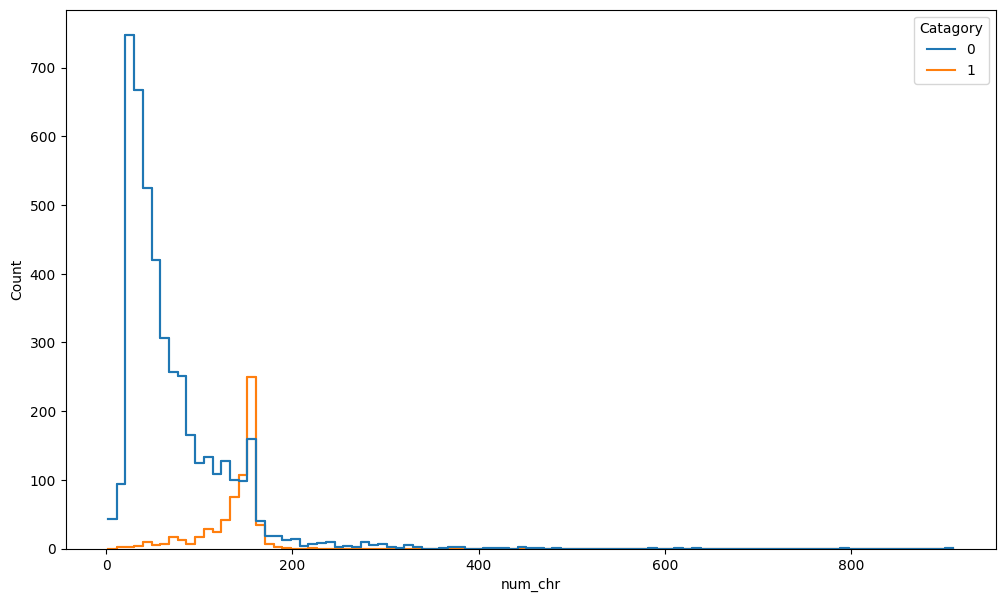

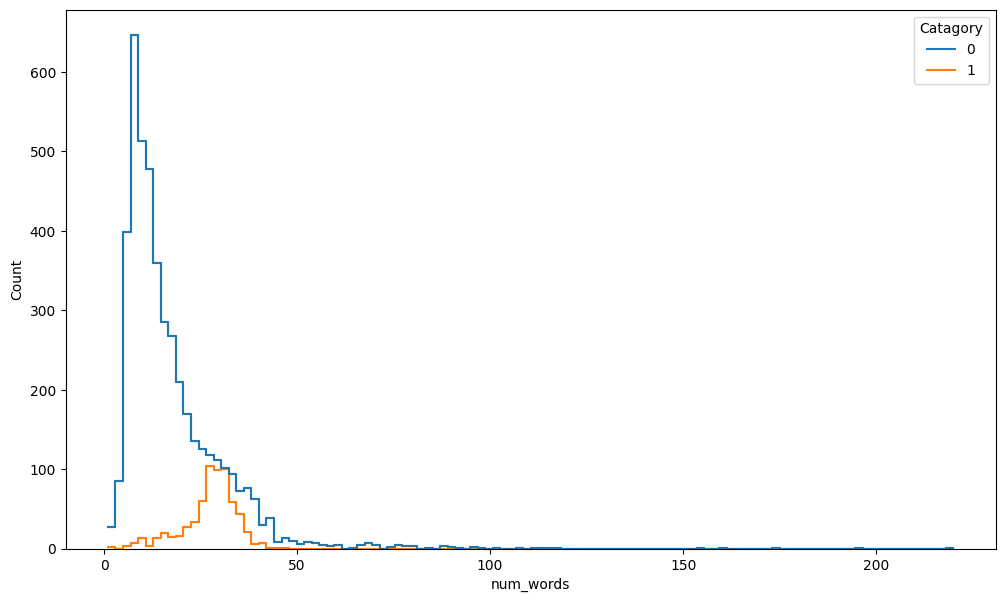

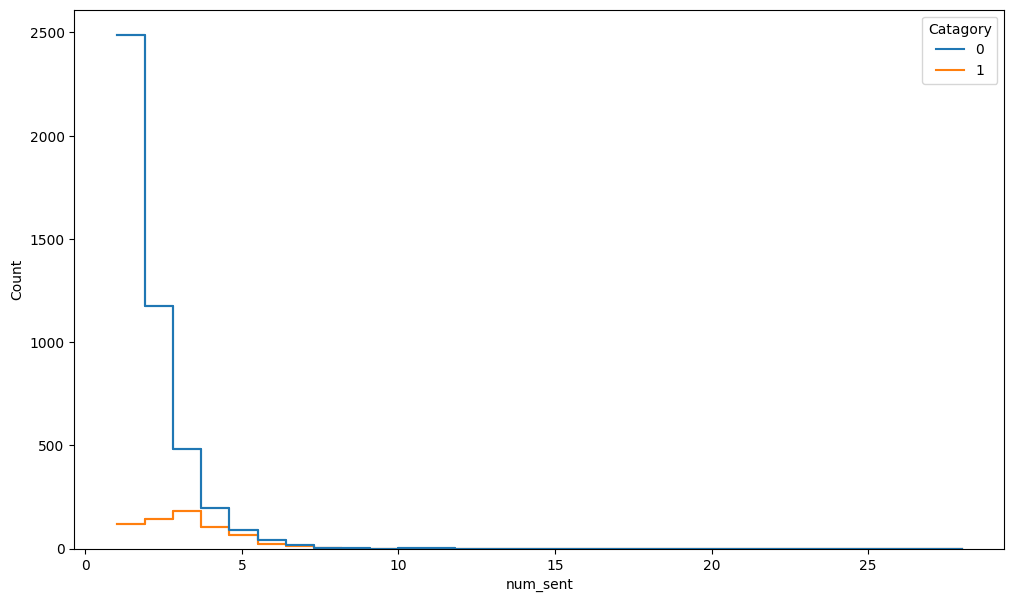

In [33]:
#Create Histogram.

plt.figure(figsize=(12,7))
sns.histplot(data=ed, x="num_chr", hue="Catagory",fill=False, element="step")
sns.histplot(data=ed, x="num_chr", hue="Catagory",fill=False, element="step")
plt.show()

plt.figure(figsize=(12,7))
sns.histplot(data=ed, x="num_words", hue="Catagory",fill=False, element="step")
sns.histplot(data=ed, x="num_words", hue="Catagory",fill=False, element="step")
plt.show()

plt.figure(figsize=(12,7))
sns.histplot(data=ed, x="num_sent", hue="Catagory",fill=False, element="step",bins=30)
sns.histplot(data=ed, x="num_sent", hue="Catagory",fill=False, element="step",bins=30)
plt.show()

<Figure size 1200x700 with 0 Axes>

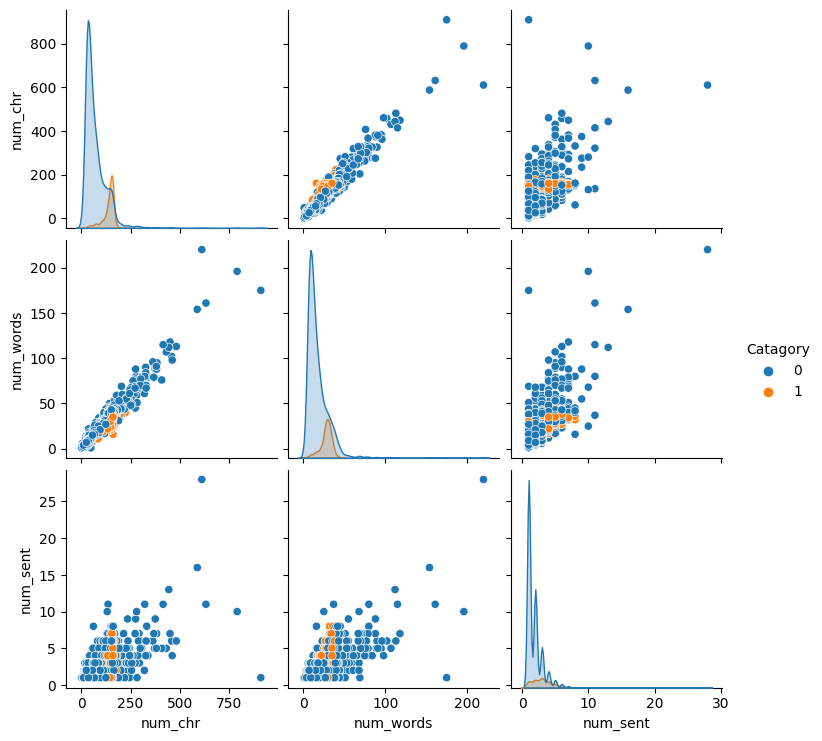

In [34]:
#Creat PaiPlot for define the relationship b/w columns.

plt.figure(figsize=(12,7))
sns.pairplot(ed,hue="Catagory")
plt.show()

C:\Users\Naren Kumar\AppData\Local\Temp\ipykernel_3344\1470343378.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ed.corr(),annot=True)


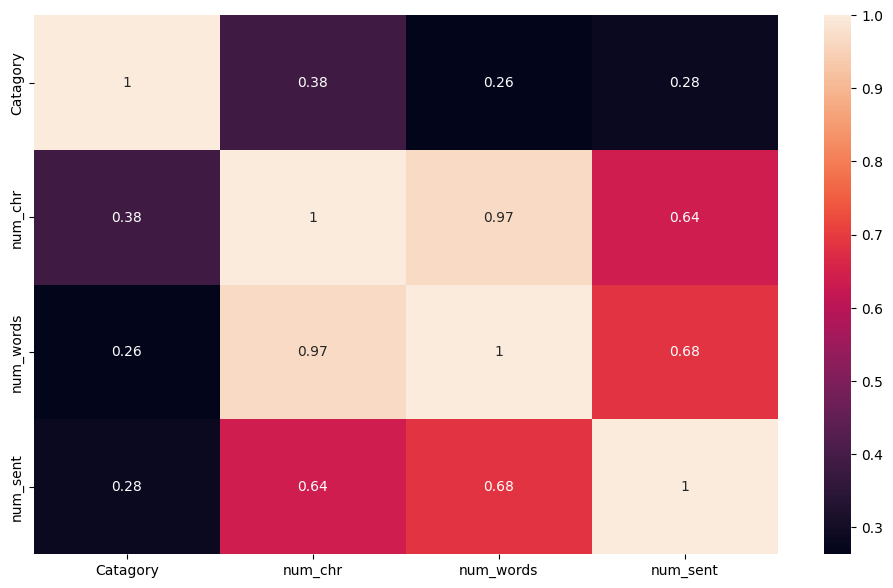

In [35]:
#Corelation heatmap

plt.figure(figsize=(12,7))
sns.heatmap(ed.corr(),annot=True)
plt.show()

# 3rd Step Data Preprocessing


1.Lower Case >>>> 2.Tokenization >>> 3.Removing special charector >>> 4.Removing stop words and punctuations >>> 5.Stemming


In [36]:
def transform_text(text):
#Lowercase    
    text = text.lower()
    
#Tokenization    
    text = nltk.word_tokenize(text)
    
#RemoveSpecialChar    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
#StopWords & Stemming    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
        
    return " ".join(y)   

In [37]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Naren
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [39]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Loving')

'love'

In [41]:
transform_text('Host-based IDPS for linux systems.')


'idp linux system'

In [42]:
ed['Email Body'][1500]


'Host-based IDPS for linux systems.'

In [43]:
ed['Transform Text'] = ed['Email Body'].apply(transform_text)


In [44]:
ed.sample(5)


,Catagory,Email Body,num_chr,num_words,num_sent,Transform Text
3170,0,Still otside le..u come 2morrow maga..,38,9,1,still otsid le u come 2morrow maga
3575,0,The sign of maturity is not when we start sayi...,154,32,2,sign matur start say big thing actual start un...
3943,0,"Until 545 lor... Ya, can go 4 dinner together...",48,12,2,545 lor ya go 4 dinner togeth
835,0,Good Morning my Dear........... Have a great &...,66,14,1,good morn dear great amp success day
4833,0,I hope your pee burns tonite.,29,7,1,hope pee burn tonit


# Create WordCloud


In [47]:
pip install wordcloud

     ------------------------------------ 153.1/153.1 kB 435.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [48]:

from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

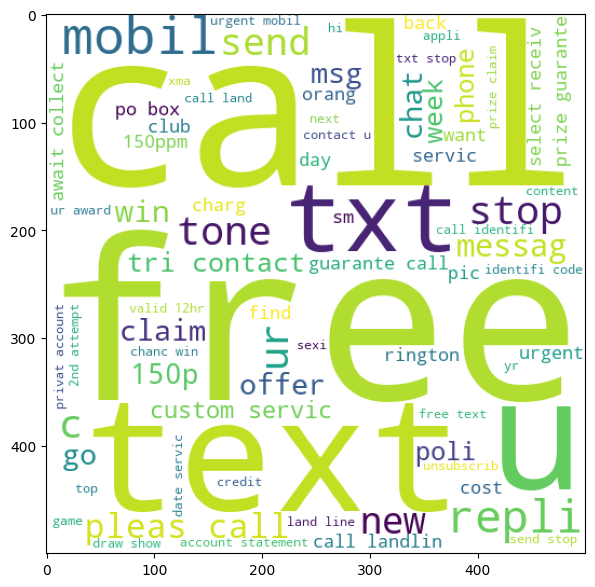

In [49]:
Spam_WC = wc.generate(ed[ed['Catagory'] == 1]['Transform Text'].str.cat(sep=" "))

plt.figure(figsize=(8,7))
plt.imshow(Spam_WC)

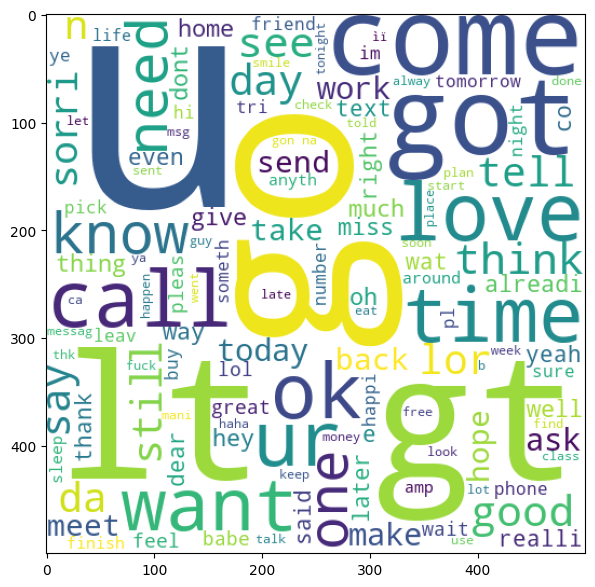

In [50]:
Ham_WC = wc.generate(ed[ed['Catagory'] == 0]['Transform Text'].str.cat(sep=" "))

plt.figure(figsize=(8,7))
plt.imshow(Ham_WC)

# Top 20 words for Spam & Ham massages.


In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [52]:
Ham_corpus = []
for msg in ed[ed['Catagory'] == 0]['Transform Text'].tolist():
    for word in msg.split():
        Ham_corpus.append(word)

In [79]:
len(Ham_corpus)

35394

# 4th Step Model Building


Text vectorization using Bag of words method


In [81]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [82]:
A = cv.fit_transform(ed['Transform Text']).toarray()


In [83]:
#5169=SMS & 6708=Words
A.shape

(5169, 6708)

In [84]:
B = ed['Catagory'].values


In [85]:
B


array([0, 0, 1, ..., 0, 0, 0])

# Train test split


In [86]:
from sklearn.model_selection import train_test_split
A_train,A_test,B_train,B_test = train_test_split(A,B,test_size=0.2,random_state=2)

Model from CountVectorizer


In [87]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [88]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [89]:
gnb.fit(A_train,B_train)
b_pred1 = gnb.predict(A_test)
print(accuracy_score(B_test,b_pred1))
print(confusion_matrix(B_test,b_pred1))
print(precision_score(B_test,b_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [90]:
mnb.fit(A_train,B_train)
b_pred2 = mnb.predict(A_test)
print(accuracy_score(B_test,b_pred2))
print(confusion_matrix(B_test,b_pred2))
print(precision_score(B_test,b_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [91]:
bnb.fit(A_train,B_train)
b_pred3 = bnb.predict(A_test)
print(accuracy_score(B_test,b_pred3))
print(confusion_matrix(B_test,b_pred3))
print(precision_score(B_test,b_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


# Model from TFIDVectorizer


In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [93]:
A = tfidf.fit_transform(ed['Transform Text']).toarray()


In [94]:
#5169=SMS & 6708=Words
A.shape

(5169, 3000)

In [95]:
B = ed['Catagory'].values


In [96]:
from sklearn.model_selection import train_test_split
A_train,A_test,B_train,B_test = train_test_split(A,B,test_size=0.2,random_state=2)


In [97]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [98]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [99]:
gnb.fit(A_train,B_train)
b_pred1 = gnb.predict(A_test)
print(accuracy_score(B_test,b_pred1))
print(confusion_matrix(B_test,b_pred1))
print(precision_score(B_test,b_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [100]:
mnb.fit(A_train,B_train)
b_pred2 = mnb.predict(A_test)
print(accuracy_score(B_test,b_pred2))
print(confusion_matrix(B_test,b_pred2))
print(precision_score(B_test,b_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [101]:
bnb.fit(A_train,B_train)
b_pred3 = bnb.predict(A_test)
print(accuracy_score(B_test,b_pred3))
print(confusion_matrix(B_test,b_pred3))
print(precision_score(B_test,b_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187
